In [1]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In this Notebook we are going to illustrate a) that we do not necessarily need to use one-hot encoding and 2) that we can save the model and the entire architecture.

For this, we will use the Functional API version of Tensorflow.  So far, we have been using the Sequential API.  The Functional API is very similar, but more powerful since we build our Neural Networks by connecting layers together.  This gives us complete control of how the Neural Network is configured.  

You can read more about the Functional API here: https://www.tensorflow.org/guide/keras/functional

For example, we could configure a Neural Network where the output of a layer is added to the output of another layer further down the line.  This is called a skip connection, and is used to prevent vanishing gradients (if the dimensions match, of course)

<img src="appi.png" width="250">

In this notebook we will not be using skip connections, but we will be using the API

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

In [4]:
raw_df = pd.read_csv('Data.csv')
raw_df = shuffle(raw_df)
raw_df.head()

Day  Month  WeekDay  Time
150    23     12        5     8
1206   31     12        5     8
1184   28      5        5     6
1421   31     12        5     8
1090   28      7        1     6

In this case, we will not on-hot encode Y.  

In [5]:
X = raw_df[['Day', 'Month', 'WeekDay']]

In [6]:
Y = raw_df['Time']

In [7]:
Y.shape

(3000,)

In [8]:
X.shape

(3000, 3)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

We will use the Functional API model to create exactly the same architecture that we used before for the multi-class classification alarm application.

In [10]:
inputs = keras.Input(shape=(3))

In [11]:
x = layers.Dense(20, activation='relu')(inputs)

In [12]:
x = layers.Dense(20, activation='relu')(x)

In [13]:
x = layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.001))(x)

In [14]:
x = layers.Dense(24)(x)

In [15]:
model = keras.Model(inputs=inputs, outputs=x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                264       
Total params: 974
Trainable params: 974
Non-trainable params: 0
_________________________________________________________________


Since we have not one-hot encoded our input, we will use SparseCategoricalCrossentropy and plain accuracy as a metric.

Both, categorical cross entropy and sparse categorical cross entropy have the same loss function. The only difference is the format in which the Y verctor (i.e. our true labels) is encoded.  If our Y variable is one-hot encoded, we use CategoricalCrossentropy. If our Y variable is intgegers, we use SparseCategoricalCrossentropy.

In [28]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

Lets train our model for 200 epochs.

In [18]:
alarm_results = model.fit(X_train, Y_train, batch_size=32, epochs = 200, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/200
75/75 - 1s - loss: 3.3685 - accuracy: 0.1229 - val_loss: 2.7222 - val_accuracy: 0.2967
Epoch 2/200
75/75 - 0s - loss: 2.2375 - accuracy: 0.2837 - val_loss: 1.7805 - val_accuracy: 0.3067
Epoch 3/200
75/75 - 0s - loss: 1.5304 - accuracy: 0.2754 - val_loss: 1.4041 - val_accuracy: 0.2917
Epoch 4/200
75/75 - 0s - loss: 1.3621 - accuracy: 0.3396 - val_loss: 1.3514 - val_accuracy: 0.3600
Epoch 5/200
75/75 - 0s - loss: 1.3224 - accuracy: 0.3404 - val_loss: 1.3159 - val_accuracy: 0.3450
Epoch 6/200
75/75 - 0s - loss: 1.2847 - accuracy: 0.3808 - val_loss: 1.2829 - val_accuracy: 0.3983
Epoch 7/200
75/75 - 0s - loss: 1.2514 - accuracy: 0.3921 - val_loss: 1.2510 - val_accuracy: 0.4167
Epoch 8/200
75/75 - 0s - loss: 1.2218 - accuracy: 0.4033 - val_loss: 1.2296 - val_accuracy: 0.3933
Epoch 9/200
75/75 - 0s - loss: 1.1923 - accuracy: 0.4087 - val_loss: 1.2044 - val_accuracy: 0.4150
Epoch 10/200
75/75 - 0s - loss: 1.1617 - accuracy: 0.4358 - val_loss: 1.1496 - val_accuracy: 0.4533
Epoch 11/

75/75 - 0s - loss: 0.6391 - accuracy: 0.6354 - val_loss: 0.6170 - val_accuracy: 0.6783
Epoch 84/200
75/75 - 0s - loss: 0.6328 - accuracy: 0.6438 - val_loss: 0.6259 - val_accuracy: 0.6533
Epoch 85/200
75/75 - 0s - loss: 0.6274 - accuracy: 0.6529 - val_loss: 0.6181 - val_accuracy: 0.6367
Epoch 86/200
75/75 - 0s - loss: 0.6262 - accuracy: 0.6567 - val_loss: 0.6003 - val_accuracy: 0.6683
Epoch 87/200
75/75 - 0s - loss: 0.6250 - accuracy: 0.6358 - val_loss: 0.6246 - val_accuracy: 0.6400
Epoch 88/200
75/75 - 0s - loss: 0.6187 - accuracy: 0.6475 - val_loss: 0.5990 - val_accuracy: 0.6800
Epoch 89/200
75/75 - 0s - loss: 0.6184 - accuracy: 0.6492 - val_loss: 0.6005 - val_accuracy: 0.6433
Epoch 90/200
75/75 - 0s - loss: 0.6118 - accuracy: 0.6629 - val_loss: 0.5901 - val_accuracy: 0.6817
Epoch 91/200
75/75 - 0s - loss: 0.6150 - accuracy: 0.6513 - val_loss: 0.5887 - val_accuracy: 0.6583
Epoch 92/200
75/75 - 0s - loss: 0.6114 - accuracy: 0.6513 - val_loss: 0.5968 - val_accuracy: 0.6617
Epoch 93/200


Epoch 165/200
75/75 - 0s - loss: 0.5818 - accuracy: 0.6592 - val_loss: 0.5645 - val_accuracy: 0.6767
Epoch 166/200
75/75 - 0s - loss: 0.5757 - accuracy: 0.6567 - val_loss: 0.5674 - val_accuracy: 0.6683
Epoch 167/200
75/75 - 0s - loss: 0.5818 - accuracy: 0.6496 - val_loss: 0.5640 - val_accuracy: 0.6367
Epoch 168/200
75/75 - 0s - loss: 0.6053 - accuracy: 0.6471 - val_loss: 0.5715 - val_accuracy: 0.6550
Epoch 169/200
75/75 - 0s - loss: 0.5791 - accuracy: 0.6637 - val_loss: 0.5820 - val_accuracy: 0.6850
Epoch 170/200
75/75 - 0s - loss: 0.5763 - accuracy: 0.6592 - val_loss: 0.5622 - val_accuracy: 0.6700
Epoch 171/200
75/75 - 0s - loss: 0.5808 - accuracy: 0.6496 - val_loss: 0.5726 - val_accuracy: 0.6717
Epoch 172/200
75/75 - 0s - loss: 0.5785 - accuracy: 0.6571 - val_loss: 0.5650 - val_accuracy: 0.6717
Epoch 173/200
75/75 - 0s - loss: 0.5786 - accuracy: 0.6587 - val_loss: 0.5689 - val_accuracy: 0.6500
Epoch 174/200
75/75 - 0s - loss: 0.5757 - accuracy: 0.6596 - val_loss: 0.5619 - val_accurac

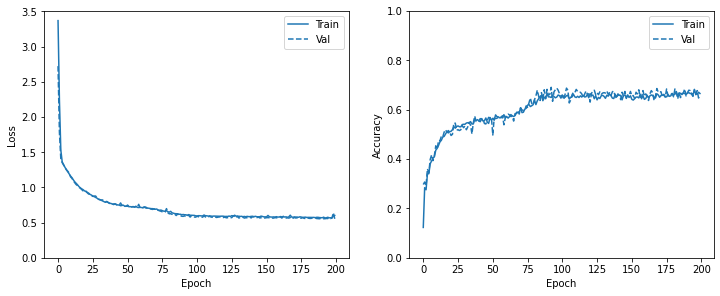

In [19]:
plot_metrics(alarm_results)

Like before, our loss is decreasing and we are learning. We have high bias, but we don't have high variance.  Hence, we can keep on training.

In [20]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

19/19 - 0s - loss: 0.5540 - accuracy: 0.6583
Test loss: 0.5540114045143127
Test accuracy: 0.6583333611488342


We have not gotten very far, since we only trained the model for 200 epochs.  But this is good enough for now.

In [21]:
Y_pred = model.predict(X_test)

When we ask our model to predict, we will not get a series of probabilities, since we did not use a softmax activation 

In [22]:
Y_pred[0]

array([-27.626276 , -24.192577 , -22.950073 , -24.921013 , -24.687828 ,
       -19.429485 ,  -3.8476787,  -4.09592  ,   0.7841179,   0.7078926,
       -21.221354 , -23.335323 , -23.550703 , -24.576597 , -23.075493 ,
       -23.84885  , -23.369286 , -22.094833 , -24.425497 , -22.240133 ,
       -26.006649 , -26.037565 , -24.98139  , -26.248707 ], dtype=float32)

Notice that since we are not using a SoftMax activation for the last layer, we do not have probabilities.  But we still pick the largest output as our prediction.

In [23]:
predictions = tf.argmax(Y_pred, axis=1)

In [24]:
predictions

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([8, 9, 6, 7, 8, 8, 9, 9, 6, 6, 8, 8, 8, 7, 6, 9, 6, 7, 6, 8, 7, 6,
       7, 9, 6, 7, 7, 8, 7, 9, 6, 7, 8, 7, 6, 6, 9, 8, 9, 9, 8, 6, 6, 9,
       9, 7, 6, 8, 7, 7, 6, 7, 6, 7, 9, 6, 8, 9, 9, 6, 9, 8, 6, 6, 9, 7,
       9, 7, 6, 9, 8, 9, 8, 8, 7, 7, 9, 9, 7, 6, 7, 9, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 7, 8, 9, 7, 8, 8, 7, 9, 8, 8, 7, 6, 8, 8, 9, 7, 6, 9, 9,
       7, 7, 9, 8, 6, 9, 8, 8, 6, 6, 7, 9, 9, 6, 6, 6, 8, 7, 9, 8, 8, 9,
       8, 8, 9, 8, 9, 7, 7, 9, 6, 9, 9, 6, 9, 9, 7, 7, 7, 7, 6, 6, 6, 7,
       9, 8, 6, 6, 9, 9, 8, 6, 6, 6, 9, 9, 9, 6, 8, 9, 8, 9, 8, 6, 8, 8,
       9, 6, 7, 8, 6, 6, 7, 7, 8, 6, 8, 8, 8, 7, 9, 7, 8, 7, 8, 6, 8, 7,
       7, 6, 8, 6, 8, 6, 9, 9, 6, 7, 8, 8, 7, 6, 8, 7, 6, 7, 6, 8, 8, 8,
       6, 8, 6, 7, 9, 9, 6, 9, 9, 7, 8, 6, 6, 8, 8, 8, 8, 6, 6, 9, 8, 6,
       8, 9, 9, 8, 7, 6, 9, 8, 7, 8, 6, 9, 9, 8, 8, 7, 8, 8, 8, 7, 8, 8,
       8, 7, 9, 7, 8, 6, 8, 6, 8, 9, 8, 7, 9, 8, 9, 9, 8, 7, 8, 7, 8, 6,
     

Since we used the API, and the API specifies the sice of the Input, we can save the entire model, including the layers and the parameters we obtained.  Lets save this partially trained model so we can use it later to demonstrate Transfer Learning. 

In [25]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


Remember that if we continue training, we will pick up from where we left.  Lets finish training this model to demonstrate how the Neural Network will learn just like before.

In [26]:
alarm_results = model.fit(X_train, Y_train, batch_size=32, epochs = 200, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/200
75/75 - 0s - loss: 0.5668 - accuracy: 0.6600 - val_loss: 0.5668 - val_accuracy: 0.6450
Epoch 2/200
75/75 - 0s - loss: 0.5685 - accuracy: 0.6692 - val_loss: 0.5506 - val_accuracy: 0.6817
Epoch 3/200
75/75 - 0s - loss: 0.5590 - accuracy: 0.6733 - val_loss: 0.5507 - val_accuracy: 0.6767
Epoch 4/200
75/75 - 0s - loss: 0.5607 - accuracy: 0.6721 - val_loss: 0.5489 - val_accuracy: 0.6767
Epoch 5/200
75/75 - 0s - loss: 0.5569 - accuracy: 0.6692 - val_loss: 0.5483 - val_accuracy: 0.6667
Epoch 6/200
75/75 - 0s - loss: 0.5557 - accuracy: 0.6779 - val_loss: 0.5485 - val_accuracy: 0.6567
Epoch 7/200
75/75 - 0s - loss: 0.5594 - accuracy: 0.6821 - val_loss: 0.5447 - val_accuracy: 0.6717
Epoch 8/200
75/75 - 0s - loss: 0.5565 - accuracy: 0.6758 - val_loss: 0.5472 - val_accuracy: 0.6900
Epoch 9/200
75/75 - 0s - loss: 0.5615 - accuracy: 0.6775 - val_loss: 0.5500 - val_accuracy: 0.6950
Epoch 10/200
75/75 - 0s - loss: 0.5507 - accuracy: 0.6837 - val_loss: 0.5409 - val_accuracy: 0.6650
Epoch 11/

75/75 - 0s - loss: 0.3412 - accuracy: 0.7992 - val_loss: 0.3480 - val_accuracy: 0.7717
Epoch 84/200
75/75 - 0s - loss: 0.3404 - accuracy: 0.7929 - val_loss: 0.3440 - val_accuracy: 0.7633
Epoch 85/200
75/75 - 0s - loss: 0.3501 - accuracy: 0.7921 - val_loss: 0.3697 - val_accuracy: 0.7917
Epoch 86/200
75/75 - 0s - loss: 0.3475 - accuracy: 0.8046 - val_loss: 0.3688 - val_accuracy: 0.8267
Epoch 87/200
75/75 - 0s - loss: 0.3504 - accuracy: 0.8012 - val_loss: 0.3417 - val_accuracy: 0.7650
Epoch 88/200
75/75 - 0s - loss: 0.3415 - accuracy: 0.7933 - val_loss: 0.3413 - val_accuracy: 0.7733
Epoch 89/200
75/75 - 0s - loss: 0.3427 - accuracy: 0.7962 - val_loss: 0.3633 - val_accuracy: 0.7850
Epoch 90/200
75/75 - 0s - loss: 0.3412 - accuracy: 0.7896 - val_loss: 0.3389 - val_accuracy: 0.7867
Epoch 91/200
75/75 - 0s - loss: 0.3359 - accuracy: 0.8121 - val_loss: 0.3455 - val_accuracy: 0.7917
Epoch 92/200
75/75 - 0s - loss: 0.3397 - accuracy: 0.8100 - val_loss: 0.3391 - val_accuracy: 0.7833
Epoch 93/200


Epoch 165/200
75/75 - 0s - loss: 0.1522 - accuracy: 0.9875 - val_loss: 0.1404 - val_accuracy: 0.9950
Epoch 166/200
75/75 - 0s - loss: 0.1489 - accuracy: 0.9862 - val_loss: 0.1331 - val_accuracy: 0.9950
Epoch 167/200
75/75 - 0s - loss: 0.1333 - accuracy: 0.9946 - val_loss: 0.1264 - val_accuracy: 0.9950
Epoch 168/200
75/75 - 0s - loss: 0.1266 - accuracy: 0.9954 - val_loss: 0.1186 - val_accuracy: 0.9967
Epoch 169/200
75/75 - 0s - loss: 0.1259 - accuracy: 0.9929 - val_loss: 0.1123 - val_accuracy: 0.9983
Epoch 170/200
75/75 - 0s - loss: 0.1149 - accuracy: 0.9958 - val_loss: 0.1195 - val_accuracy: 0.9883
Epoch 171/200
75/75 - 0s - loss: 0.1081 - accuracy: 0.9975 - val_loss: 0.1031 - val_accuracy: 0.9983
Epoch 172/200
75/75 - 0s - loss: 0.1027 - accuracy: 0.9975 - val_loss: 0.1011 - val_accuracy: 0.9983
Epoch 173/200
75/75 - 0s - loss: 0.0980 - accuracy: 0.9979 - val_loss: 0.0939 - val_accuracy: 0.9983
Epoch 174/200
75/75 - 0s - loss: 0.0907 - accuracy: 0.9983 - val_loss: 0.0870 - val_accurac